# Redes Neuronales

In [35]:
from IPython.display import Image
import pytorch_lightning as pl
import os
import sys
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
device = 'cpu'
sys.path.append('/home/sebacastillo/neuralnets/')
from src.utils import get_project_root
root = get_project_root()

## Progress bar
from tqdm.notebook import tqdm

import torch
print("Using torch", torch.__version__)
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim

Using torch 2.0.0+cu117


In [36]:
torch.manual_seed(42) # Setting the seed

# First DNN

In [37]:
class MLP(nn.Module):
    def __init__(self, input_size, layer_config, output_size, activation_functions, learning_rate):
        super(MLP, self).__init__()
        
        assert len(layer_config) == len(activation_functions), "Number of activation functions must match the number of hidden layers"
        
        self.layers = nn.ModuleList()
        self.activation_functions = activation_functions

        # Add the first layer (input layer)
        self.layers.append(nn.Linear(input_size, layer_config[0]))

        # Add hidden layers
        for i in range(1, len(layer_config)):
            self.layers.append(nn.Linear(layer_config[i-1], layer_config[i]))

        # Add the output layer
        self.layers.append(nn.Linear(layer_config[-1], output_size))

        # Set up the optimizer with the custom learning rate
        self.optimizer = optim.Adam(self.parameters(), lr=learning_rate)
        self.criterion = nn.CrossEntropyLoss()

    def forward(self, x):
        for i, layer in enumerate(self.layers[:-1]):
            x = self.activation_functions[i](layer(x))  # Apply the activation function for the input and hidden layers
        x = self.layers[-1](x)  # Do not apply activation function in the output layer
        return x


In [38]:
## Preprocess the data
# Read the CSV file using pandas
csv_file_path = '/home/sebacastillo/neuralnets/data/data/concentlite.csv'
dataframe = pd.read_csv(csv_file_path)
X = dataframe.iloc[:, 0:2].values
y = dataframe.iloc[:, 2].values
y = np.where(y < 0, 0, 1)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
X_train = torch.tensor(X_train, dtype=torch.float32)
X_test = torch.tensor(X_test, dtype=torch.float32)
y_train = torch.tensor(y_train, dtype=torch.long)
y_test = torch.tensor(y_test, dtype=torch.long)

In [39]:
layer_config = [64, 64]
activation_functions = [F.relu, F.relu]
model = MLP(input_size=2, 
            layer_config=layer_config, 
            output_size=2, 
            activation_functions=activation_functions,
            learning_rate=0.001)


In [40]:
print(model)

MLP(
  (layers): ModuleList(
    (0): Linear(in_features=2, out_features=64, bias=True)
    (1): Linear(in_features=64, out_features=64, bias=True)
    (2): Linear(in_features=64, out_features=2, bias=True)
  )
  (criterion): CrossEntropyLoss()
)


In [41]:
num_epochs = 500
train_loss_history = []
test_loss_history = []

for epoch in range(num_epochs):
    # Forward pass
    train_outputs = model(X_train)
    train_loss = criterion(train_outputs, y_train)
    
    # Backward pass and optimization
    optimizer.zero_grad()
    train_loss.backward()
    optimizer.step()

    # Test the model
    with torch.no_grad():
        test_outputs = model(X_test)
        test_loss = criterion(test_outputs, y_test)

    # Save loss values for plotting
    train_loss_history.append(train_loss.item())
    test_loss_history.append(test_loss.item())

    # Print epoch progress
    if (epoch+1) % 100 == 0:
        print(f"Epoch [{epoch+1}/{num_epochs}], Train Loss: {train_loss.item():.4f}, Test Loss: {test_loss.item():.4f}")

# Plot the loss curve
plt.plot(train_loss_history, label="Train Loss")
plt.plot(test_loss_history, label="Test Loss")
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.legend()
plt.title("Loss Curve")
plt.show()


ValueError: Using a target size (torch.Size([665])) that is different to the input size (torch.Size([665, 2])) is deprecated. Please ensure they have the same size.

In [ ]:
def calculate_accuracy(model, X, y):
    with torch.no_grad():
        outputs = model(X)
        predicted_labels = torch.argmax(outputs, axis=1)
        correct = (predicted_labels == y).sum().item()
        accuracy = correct / len(y)
    return accuracy

# Evaluate the model on the test dataset
test_accuracy = calculate_accuracy(model, X_test, y_test)
print(f"Test accuracy: {test_accuracy * 100:.2f}%")

Test accuracy: 49.10%


# Second DNN

In [ ]:
from IPython.display import Image
import pytorch_lightning as pl
import os
import sys
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
device = 'cpu'
sys.path.append('/home/sebacastillo/neuralnets/')
from src.utils import get_project_root
root = get_project_root()

## Progress bar
from tqdm.notebook import tqdm

import torch
print("Using torch", torch.__version__)
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim

Using torch 2.0.0+cu117


In [ ]:
torch.manual_seed(42) # Setting the seed

In [ ]:
# data
# Read the CSV file using pandas
csv_file_path = '/home/sebacastillo/neuralnets/data/data/concentlite.csv'
dataframe = pd.read_csv(csv_file_path)
X = dataframe.iloc[:, 0:2].values
y = dataframe.iloc[:, 2].values
y = np.where(y < 0, 0, 1)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
X_train = torch.tensor(X_train, dtype=torch.float32)
X_test = torch.tensor(X_test, dtype=torch.float32)
y_train = torch.tensor(y_train, dtype=torch.long)
y_test = torch.tensor(y_test, dtype=torch.long)

In [ ]:
class customDNN(nn.Module):
    
    def __init__(self, input_size, neurons_l1, neurons_l2, neurons_l3, output_size):
        super(customDNN, self).__init__()
        self.layer1 = nn.Linear(input_size, neurons_l1)
        self.layer2 = nn.Linear(neurons_l2, neurons_l2)
        self.layer3 = nn.Linear(neurons_l3, output_size)

    def forward(self, x):
        x = torch.tanh(self.layer1(x))
        x = torch.tanh(self.layer2(x))
        x = self.layer3(x)
        return x

In [31]:
# 20 epocas
#model = customDNN(2, 124, 124, 124, 2) # ac:61&
# 100 epocas
#model = customDNN(2, 82, 82, 82, 2) # ac:79&
# 300 epocas
model = customDNN(2, 64, 64, 64, 2) # ac:94&
# 500 epocas
#model = customDNN(2, 64, 64, 64, 2) # ac:99&
#model = customDNN(2, 32, 32, 32, 2) # ac:99%
#model = customDNN(2, 26, 26, 26, 2) # ac:99%
#model = customDNN(2, 12, 12, 12, 2) # ac:68%
#model = customDNN(2, 8, 8, 8, 2) # ac:73%
# 1000 epocas
# model = customDNN(2, 12, 12, 12, 2) # ac:94%
#model = customDNN(2, 8, 8, 8, 2) # ac:68%
# 2000 epocas
#model = customDNN(2, 8, 8, 8, 2) # ac:98%

In [42]:
print(model)

MLP(
  (layers): ModuleList(
    (0): Linear(in_features=2, out_features=64, bias=True)
    (1): Linear(in_features=64, out_features=64, bias=True)
    (2): Linear(in_features=64, out_features=2, bias=True)
  )
  (criterion): CrossEntropyLoss()
)


In [45]:
# Loss function and optimizer
criterion = nn.CrossEntropyLoss()
#criterion = nn.BCELoss()
# optimizer
optimizer = optim.Adam(model.parameters(), lr=0.001)
#optimizer = optim.SGD(model.parameters(), lr=0.001, momentum=0.9)  # peores resultados que ADM

In [ ]:
# Train the model
num_epochs = 500
train_loss_history = []
test_loss_history = []

for epoch in range(num_epochs):
    # Forward pass
    train_outputs = model(X_train)
    train_loss = criterion(train_outputs, y_train)
    
    # Backward pass and optimization
    optimizer.zero_grad()
    train_loss.backward()
    optimizer.step()

    # Test the model
    with torch.no_grad():
        test_outputs = model(X_test)
        test_loss = criterion(test_outputs, y_test)

    # Save loss values for plotting
    train_loss_history.append(train_loss.item())
    test_loss_history.append(test_loss.item())

    # Print epoch progress
    if (epoch+1) % 20 == 0:
        print(f"Epoch [{epoch+1}/{num_epochs}], Train Loss: {train_loss.item():.4f}, Test Loss: {test_loss.item():.4f}")

# Plot the loss curve
plt.plot(train_loss_history, label="Train Loss")
plt.plot(test_loss_history, label="Test Loss")
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.legend()
plt.title("Curva de Error")
plt.show()

In [47]:
def calculate_accuracy(model, X, y):
    with torch.no_grad():
        outputs = model(X)
        predicted_labels = torch.argmax(outputs, axis=1)
        correct = (predicted_labels == y).sum().item()
        accuracy = correct / len(y)
    return accuracy

# Evaluate the model on the test dataset
test_accuracy = calculate_accuracy(model, X_test, y_test)
print(f"Test accuracy: {test_accuracy * 100:.2f}%")


Test accuracy: 99.40%


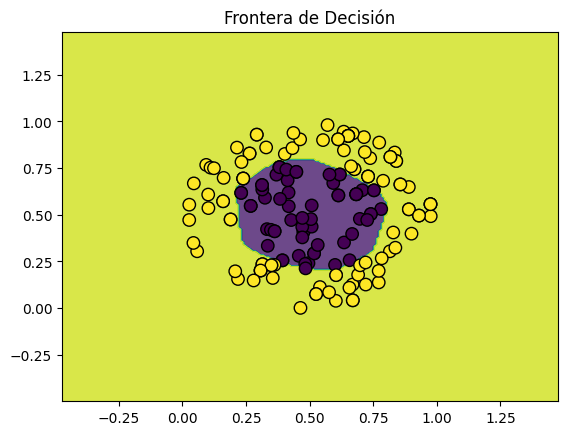

In [48]:
def plot_decision_boundary(model, X, y):
    # Create a meshgrid for the plot
    h = 0.01
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                         np.arange(y_min, y_max, h))

    # Convert meshgrid to PyTorch tensor and make predictions
    mesh_input = torch.tensor(np.c_[xx.ravel(), yy.ravel()], dtype=torch.float32)
    with torch.no_grad():
        mesh_output = model(mesh_input)
        mesh_predictions = torch.argmax(mesh_output, axis=1).numpy()

    # Reshape the predictions to match the meshgrid shape
    zz = mesh_predictions.reshape(xx.shape)

    # Create the plot
    plt.contourf(xx, yy, zz, alpha=0.8)
    plt.scatter(X[:, 0], X[:, 1], c=y, edgecolors='k', marker='o', s=80)
    plt.xlim(X[:, 0].min() - 0.5, X[:, 0].max() + 0.5)
    plt.ylim(X[:, 1].min() - 0.5, X[:, 1].max() + 0.5)
    plt.title("Frontera de Decisión")
    plt.show()

# Convert tensors back to NumPy arrays for plotting
X_test_np = X_test.numpy()
y_test_np = y_test.numpy()

# Plot the decision boundary
plot_decision_boundary(model, X_test_np, y_test_np)
